# IV Simulator: A python class which simulates PV faults in IV curves

## Step 1: Start off by instantiating the object.

In [1]:
from pvops.iv import simulator

sim = simulator.Simulator()

## Step 2: Definition of Faults

Two methods exist to define a fault:
1. Use a pre-existing definition (defined by authors) by calling `add_preset_conditions` 
2. Manually define a fault by calling `add_manual_condition`


In [2]:
heavy_shading = {'identifier':'heavy_shade',
                   'E': 400,
                   'Tc': 20}
light_shading = {'identifier':'light_shade',
                    'E': 800}
sim.add_preset_conditions('landscape', heavy_shading, rows_aff = 2)
sim.add_preset_conditions('portrait', heavy_shading, cols_aff = 2)
sim.add_preset_conditions('pole', heavy_shading, light_shading = light_shading, width = 2, pos = None)

sim.print_info()

Condition list: (Cell definitions)
	[pristine]: 1 definition(s)
	[heavy_shade]: 1 definition(s)
	[light_shade]: 1 definition(s)

Modcell types: (Cell mappings on module)
	[pristine]: 1 definition(s)
	[landscape_2rows]: 1 definition(s)
	[portrait_2cols]: 1 definition(s)
	[pole_2width]: 1 definition(s)

String definitions (Series of modcells)
	No instances.



## Manual definitions of faults

To define a fault manually, you must provide two specifications:
1. Mapping of cells onto a module, which we call a `modcell`
2. Definition of cell conditions, stored in `condition_dict`

In [3]:
modcells = { 'another_example':  [[0,0,0,0,0,0,0,0,0,0,  # Using 2D list (aka, multiple conditions as input)
                                    1,1,1,1,1,1,1,1,1,1,
                                    1,1,1,0,0,0,0,1,1,1, 
                                    1,1,1,0,0,0,0,1,1,1,
                                    1,1,1,0,0,0,0,1,1,1,  
                                    0,0,0,0,0,0,0,0,0,0],

                                  [1,1,1,1,1,1,1,1,1,1,  
                                    0,0,0,0,0,0,0,0,0,0,
                                    0,0,0,1,1,1,1,0,0,0, 
                                    0,0,0,1,1,1,1,0,0,0,
                                    0,0,0,1,1,1,1,0,0,0,  
                                    1,1,1,1,1,1,1,1,1,1]]
            }
condition_dict = {0: {},
                  1: {'identifier': 'heavy_shade',
                      'E': 405,
                     }                              
                 }
sim.add_manual_conditions(modcells, condition_dict)

sim.print_info()

Condition list: (Cell definitions)
	[pristine]: 1 definition(s)
	[heavy_shade]: 2 definition(s)
	[light_shade]: 1 definition(s)

Modcell types: (Cell mappings on module)
	[pristine]: 1 definition(s)
	[landscape_2rows]: 1 definition(s)
	[portrait_2cols]: 1 definition(s)
	[pole_2width]: 1 definition(s)
	[another_example]: 2 definition(s)

String definitions (Series of modcells)
	No instances.



### Step 3: Generate many samples via latin hypercube sampling
    Pass in dictionaries which describe a distribution.
        {PARAMETER: {'mean': MEAN_VAL,
                     'std': STDEV_VAL,
                     'low': LOW_VAL,
                     'upp': UPP_VAL
                    }
        }

    PARAMETER: parameter defined in condition_dict

If all values are provided, a truncated gaussian distribution is used

If _low_ and _upp_ not specified, then a gaussian distribution is used
    

In [4]:
N = 10
dicts = {'E': {'mean': 400,
               'std': 500,
               'low': 200,
               'upp': 600},

         'Tc':{'mean': 30,
               'std': 10}}


sim.generate_many_samples('heavy_shade', N, distributions = dicts)

dicts = {'E': {'mean': 800,
               'std': 500,
               'low': 600,
               'upp': 1000}}

sim.generate_many_samples('light_shade', N, distributions = dicts)

sim.print_info()

Condition list: (Cell definitions)
	[pristine]: 1 definition(s)
	[heavy_shade]: 12 definition(s)
	[light_shade]: 11 definition(s)

Modcell types: (Cell mappings on module)
	[pristine]: 1 definition(s)
	[landscape_2rows]: 1 definition(s)
	[portrait_2cols]: 1 definition(s)
	[pole_2width]: 1 definition(s)
	[another_example]: 2 definition(s)

String definitions (Series of modcells)
	No instances.



### Step 4: Define a string as an assimilation of modcells

Define a dictionary with `keys` as the string name and values as a list of module names.

    {STRING_IDENTIFIER: LIST_OF_MODCELL_NAMES}

Use `sim.modcells.keys()` to get list of modules defined thusfar, or look at _modcell types_ list in function call `sim.print_info()`

In [3]:
sim.modcells.keys()

dict_keys(['pristine', 'landscape_2rows', 'portrait_2cols', 'pole_2width'])

In [5]:
sim.build_strings({'pole_bottom_mods': ['pristine', 'pristine', 'pristine', 'pristine', 'pristine', 'pristine',
                                        'pole_2width', 'pole_2width', 'pole_2width', 'pole_2width', 'pole_2width', 'pole_2width'],
                   'portrait_2cols_3bottom_mods': ['pristine', 'pristine', 'pristine', 'pristine', 'pristine', 'pristine',
                                                   'pristine', 'pristine', 'pristine', 'portrait_2cols', 'portrait_2cols', 'portrait_2cols']})

### Step 5: Simulate!

`sim.simulate()`  simulates all cells, substrings, modules, and strings defined in steps 2 - 4

In [6]:
import time
start_t = time.time()
sim.simulate()
print(f'\nSimulations completed after {round(time.time()-start_t,2)} seconds')

sim.print_info()

Simulating cells:   0%|                                                                          | 0/3 [00:00<?, ?it/s]c:\users\mwhopwo\appdata\local\programs\python\python36\lib\site-packages\scipy\optimize\zeros.py:463: RuntimeWarning: some failed to converge after 100 iterations
  warnings.warn(msg, RuntimeWarning)
Adding up other definitions: 100%|███████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.62it/s]


Simulations completed after 11.74 seconds
Condition list: (Cell definitions)
	[pristine]: 1 definition(s)
	[heavy_shade]: 12 definition(s)
	[light_shade]: 11 definition(s)

Modcell types: (Cell mappings on module)
	[pristine]: 1 definition(s)
	[landscape_2rows]: 1 definition(s)
	[portrait_2cols]: 1 definition(s)
	[pole_2width]: 1 definition(s)
	[another_example]: 2 definition(s)

String definitions (Series of modcells)
	[pole_bottom_mods]: 132 definition(s)
	[portrait_2cols_3bottom_mods]: 12 definition(s)



### Step 6: Visualization suite
1) Plot distribution of cell-condition parameter definitions defined in steps 2 and 3

1a) TODO: The truncated gaussians should show cutoff at tails

2) Plot module-level IV curves

3) Plot string-level IV curves

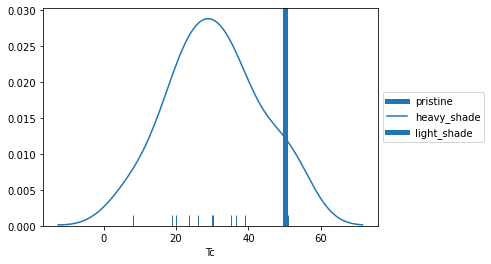

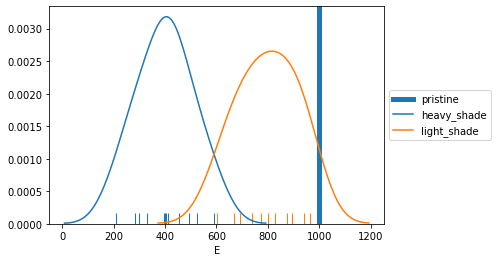

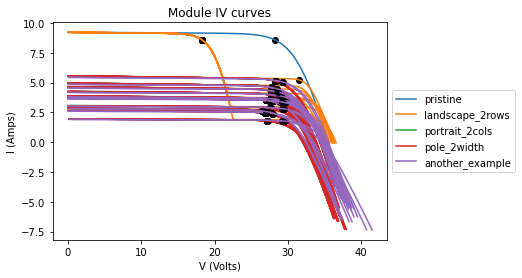

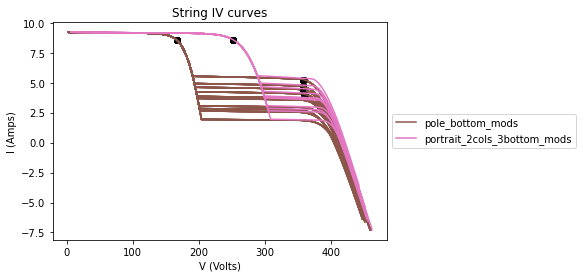

In [7]:
sim.visualize()

### Step 6 cont'd: Visualize cell IV curves and settings

    visualize_cell_level_traces(cell_identifier, cutoff = True, table = True)

Automatically turns off table if the cell_identifier's number of definitions > 20


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A4685F5D68>,
      dtype=object)

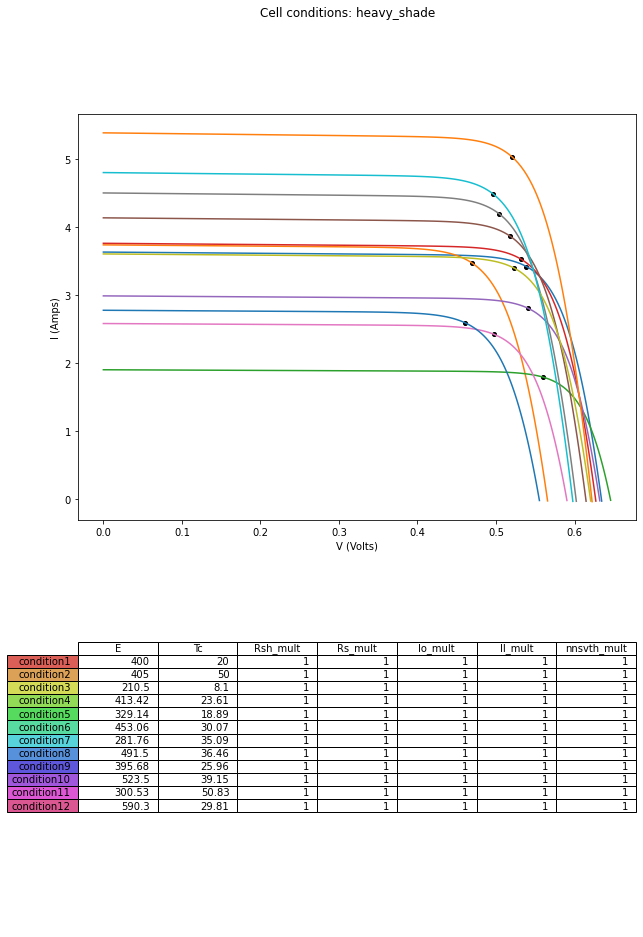

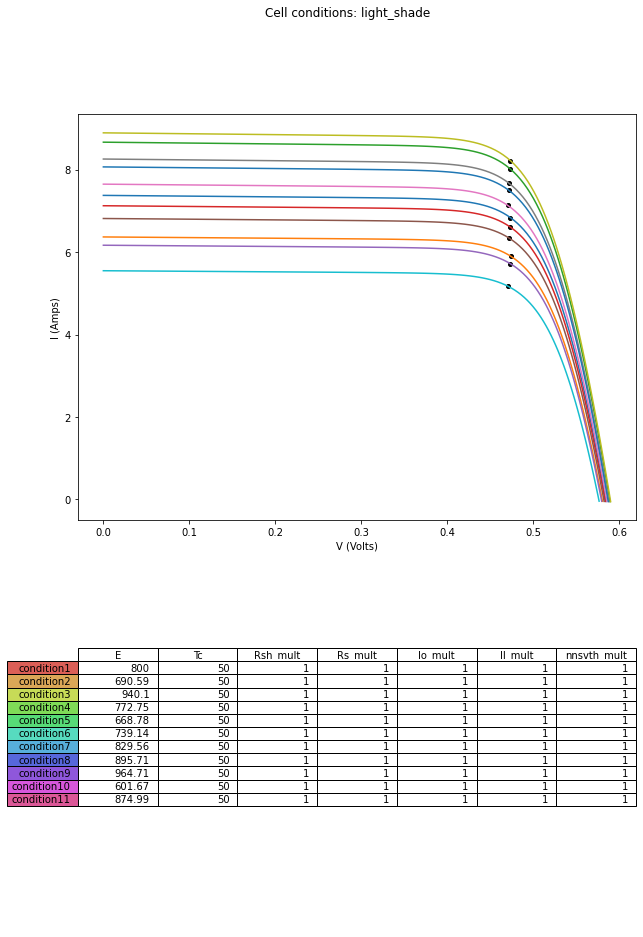

In [8]:
sim.visualize_cell_level_traces('heavy_shade', cutoff = True, table = True)
sim.visualize_cell_level_traces('light_shade', cutoff = True, table = True)

### Step 6 cont'd: Visualize modcells

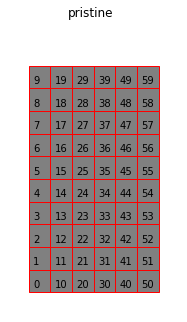

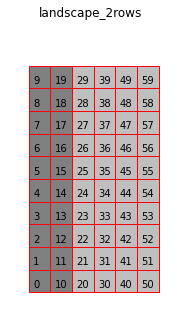

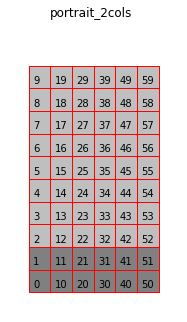

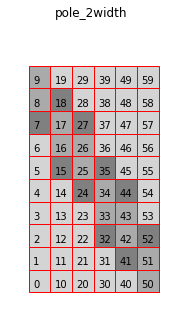

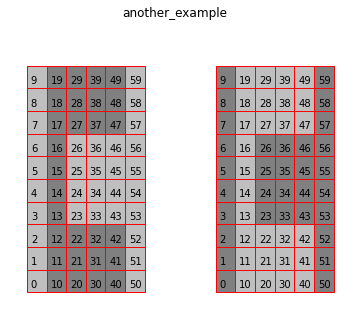

In [9]:
for mod_identifier in sim.modcells.keys():
    sim.visualize_module_configurations(mod_identifier, title = mod_identifier)